Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Anamarija Hauptman"
COLLABORATORS = ""

---

# Domača naloga 4: Robustno iskanje 2D objektov

1. Zgornji in spodnji prag za povezovanje robov pri Canny-jevem detektorju robov lahko avtomatsko izračunamo na podlagi statistične analize sivin v sliki. Napišite funkcijo za detekticijo robov, ki avtomatsko izračuna spodnji in zgornji prag za povezovanje robov in ju nato uporabi za detekcijo s Cannyjevim detektorjem. Z uporabo vhodne spremenljivke `thr_type` ločite med dvema načinoma določanja pragov:

  * `thr_type = 1`:
    $$ T_L = \max{(0, (1 - \sigma) m)} $$
    $$ T_H = \min{(255, (1 + \sigma) m)} $$

  * `thr_type = 2`:
    $$ T_L = T_O/2 $$
    $$ T_H = T_O $$

  kjer je $m$ mediana sivin v sliki, $\sigma=1/3$ in $T_O$ je prag pridobljen z Otsu upragovljanjem. Otsu upragovljanje avtomatsko določi prag, ki najbolje razmeji sliko na dva dela. Funkcijo poiščite v knjižnici OpenCV. Na treh lastno poiskanih slikah, ki imajo različne zahtevnosti določanja robov, primerjajte oba avtomatska načina izbire z ročno izbranima pragovoma, ki najbolje izluščita rob. Prikažite slike in izračunane slike robov, komentirajte rezultate in uspešnost avtomatskih postopkov.

Implementirajte funkcijo `canny`:

In [1]:
import numpy as np
import cv2 as cv
from rvlib import showImage, gammaImage
import matplotlib.pyplot as plt

imgG = cv.imread('data/slika1.jpg', 0) # s parametrom 0 loadamo grayscale

In [20]:
def cornersDetector(iImage, thr_type=1):
    iImage = cv.cvtColor(iImage, cv.COLOR_BGR2GRAY)
    if thr_type == 1:
        sigma = 1/3
        m = np.mean(iImage)
        T_l = np.max([0, int((1 - sigma) * m)])
        T_h = np.min([255, int((1 + sigma) * m)])
    elif thr_type == 2:
        T_O, _ = cv.threshold(iImage, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
        T_l = T_O / 2
        T_h = T_O
    else:
        return np.zeros_like(iImage)
    oImage = cv.Canny(iImage, T_l, T_h)
    return oImage

Prikažite originale izbranih slik in izračunane slike robov na oba načina (`thr_type = 1` in `thr_type = 2`):

uint8


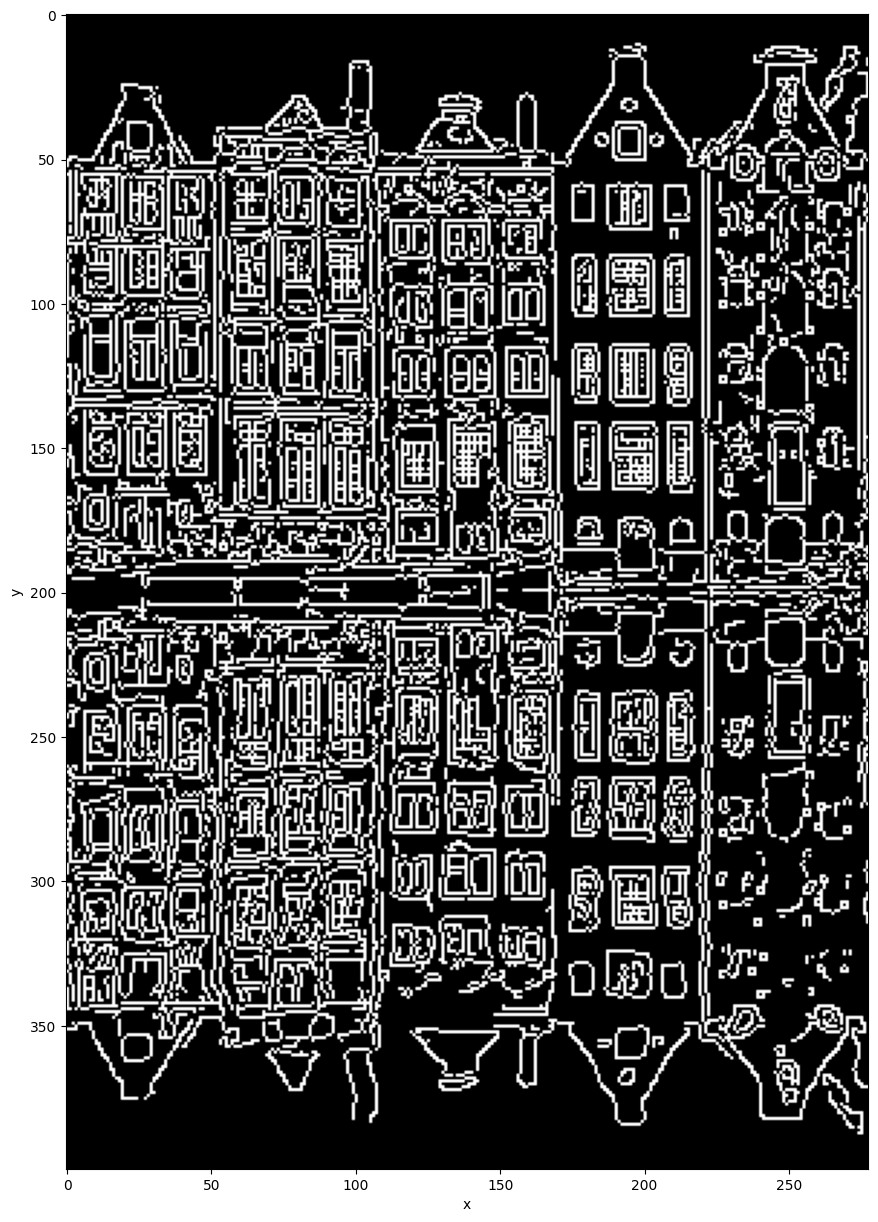

In [21]:

img1 = cv.imread('data/slika1.jpg')
edges1 = cornersDetector(img1, thr_type=2)
showImage(edges1)

Komentirajte rezultate in uspešnost avtomatskih postopkov:

2. Na vajah smo si pogledali Houghovo transformacijo za detekcijo premic v sliki. Na podoben način lahko detektiramo tudi okrogle strukture na sliki. Naložite sliko `data/slika4.jpg` barvnih kroglic, jo zgladite z Gaussovim filtrom iz knjižnice OpenCV z velikosto jedra $3 \times 3$, ter nato uporabite OpenCV funkcijo `HoughCircles` za detekcijo središč in radijev krožnic. Kot rezultat detekcije na originalno sliko superponirajte narisane krožnice (funkcija `circle`) detektiranih kroglic. Število detektiranih kroglic tudi izpišite. Na podlagi barvnega tona (iz $HSV$ prostora) središča krožnice avtomatsko preštejte število kroglic vsake barve. Opozorilo: funkcija `HoughCircles` že sama uporabi Cannyjev detektor robov, pragova pa podate kot parametra `param1` in `param2`, zato je vhodna slika v funkcijo sivinska slika in ne slika robov kot je bilo to na vajah. Pravilno izbiro pragov pa vseeno poiščite s klicem funkcije `Canny` in prikazom njenega rezultata.

In [ ]:
import cv2 as cv
from rvlib import showImage
import numpy as np

# Glajenje
img4 = cv.imread('data/slika4.jpg')

Napišite kodo za detekcijo krožnic:

Prikažite originalno sliko s superponiranimi krožnicami in izpišite število detektiranih kroglic:

Preštejte število kroglic vsake barve in izpišite števila:

3. Z drugačno kriterijsko funkcijo, kot jo za analizo lastnih vrednosti $\lambda_1$ in $\lambda_2$ matrike $M$, $\lambda_1 >\lambda_2$, uporablja Harrisov detektor oglišč, lahko iščemo, detektiramo ali poudarjamo podolgovate strukture v sliki. Ena od tovrstnih funkcij je **linearna anizotropičnost**:
$$Q_{LA} = \frac{\lambda_1 - \lambda_2}{\lambda_1 + \lambda_2 + \beta}\,,$$
kjer je $\beta > 0$ poljubna konstanta. Napišite funkcijo za poudarjanje podolgovatih struktur v vhodni sivinski sliki `iImage`:
    ```python
    def enhanceLinear( iImage, iSigma, iBeta ):
        return oQLA
    ```
kjer je `iSigma` standardna deviacija Gaussove funkcije za glajenje elementov matrike $M$, `iBeta` pa poljubna nenegativna konstanta. Nesortirane lastne vrednosti Harrisovega detektorja lahko dobite z OpenCV funkcijo `cornerEigenValsAndVecs`.

 Naložite barvno $RGB$ sliko `data/slika5.png`, jo pretvorite v sivinsko sliko in nelinearno skalirajte z vrednostjo $\gamma=2$. Uporabite funkcijo `enhanceLinear()` za poudarjanje cest na satelitski sliki tako, da določite optimalne vrednosti parametrov `iSigma` in `iBeta`. Prikažite po vašem optimalen odziv `oQLA` s poudarjenimi podolgovatimi strukturami in izpišite izbrani vrednosti `iSigma` in `iBeta`. Z upragovljanjem odziva izluščite masko cest in jih na barvni sliki pobarvajte z rdečo barvo.

 S primerno izbiro parametrov lahko Harrisov detektor uporabimo tudi za zaznavanje okroglih struktur. Na isti sivinski in nelinearno skalirani sliki s funkcijo `cornerHarris` razmejite območja objektov in območja brez rastja. Pridobljeni odziv prikažite, njegovo razmejitev pa uporabite na barvni sliki za obarvanje teh območij z modro barvo. Ena izmed možnih rešitev je prikazana na spodnji sliki.

 ![Road detection](images/RV_5_SLO_road_detection.png)

Implementirajte funkcijo `enhanceLinear`:

In [ ]:

def enhanceLinear( iImage, iSigma, iBeta ):
   
    return oQLA

Naložite barvno $RGB$ sliko `data/slika5.png`, jo pretvorite v sivinsko sliko, jo nelinearno skalirajte z vrednostjo $\gamma=2$ ter prikažite dobljeno sliko:

Poiščite optimalne parametre `iSigma` in `iBeta`. Prikažite odziv funkcije `enhanceLinear` z optimalnimi parametri in izpišite le-te parametre:

Upragovite odziv, izluščite masko cest in na originalni sliki pobarvajte ceste z rdečo barvo ter prikažite dobljeno sliko:

Na isti sivinski in nelinearno skalirani sliki s funkcijo `cornerHarris` izluščite območja objektov in območja brez rastja. Pridobljeni odziv prikažite:

Na originalno sliko z obarvanimi cestami obarvajte z modro barvo še območja objektov ter prikažite dobljeno sliko:
